<a href="https://colab.research.google.com/github/syafnur1/Final-Project-Rakamin/blob/main/Stage_1_W13_K8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 8 (ARISE)



## STAGE 0


###A) Business Background


Menurut data dari [statista.com](https://www.statista.com/statistics/933710/professional-services-worldwide-employee-attrition/), tingkat pengunduran diri karyawan organisasi profesional di seluruh dunia meningkat secara keseluruhan di antara tahun 2013 hingga 2022, meskipun ada beberapa fluktuasi. Selama survei tahun 2022, responden melaporkan rata-rata tingkat pengunduran diri karyawan hampir 14 persen. Hal tersebut juga terjadi di perusahaan ARISE. Perusahaan ARISE menghadapi tingkat atrisi yang signifikan karena banyak pegawai yang memilih untuk mengundurkan diri. Situasi ini berpotensi merusak reputasi perusahaan dan mengganggu kelancaran operasional karena perlu mencari pengganti bagi pegawai yang mengundurkan diri serta melihat karyawan yang bertahan pada perusahaan. Selain itu, hal ini juga dapat berdampak negatif pada moral pegawai yang tersisa. Oleh karena itu, tim HR, Data, dan Business Intelligence bekerja sama dengan tim terkait untuk mencari solusi yang tepat guna mengatasi permasalahan ini.

#### Our Role
- Data Scientist Team
- HR Analytics Team
- Business Intelligence (BI) Team



#### Our Goal
Menurunkan employee **attrition** rate dari 16% menjadi dibawah 10%.


#### Objectives

- Melihat faktor apa saja yang menyebabkan pegawai tersebut resign.
- Membuat model klasifikasi yang mampu mendeteksi pegawai yang memiliki kecenderungan untuk resign.
- Membuat model clustering untuk melakukan segmentasi pegawai.

#### Business Metrics Recommendation

**Employee Attrition rate** (# user yang left) <br><br>ket: jumlah pegawai yang berhenti

## STAGE 1



###B) Data Preparation

#### Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.22.4
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

#### Load Dataset

In [ ]:
# Let's download the data files using gdown

url = "https://drive.google.com/file/d/1do_qWbGJmG-Wb9Iq-YjPxOlYlzEqaFTD/view?usp=share_link"
output = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1do_qWbGJmG-Wb9Iq-YjPxOlYlzEqaFTD
To: /content/WA_Fn-UseC_-HR-Employee-Attrition.csv
100%|██████████| 228k/228k [00:00<00:00, 82.4MB/s]


'WA_Fn-UseC_-HR-Employee-Attrition.csv'

* Read Dataset

In [ ]:
# load dataset Cara 1
df = pd.read_csv(output)

pd.set_option ('display.max_columns', None) # to Display all columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset Cara 2
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option ('display.max_columns', None)
# pd.set_option ('display.max_rows', None)

In [ ]:
# Overview dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Data Dictionary
0. Age = Umur karyawan
1. Attrition = Karyawan melakukan atrisi atau tidak (Yes/No)
2. BusinessTravel = Frekuensi perjalanan untuk urusan bisnis
3. DailyRate = Gaji/pendapatan karyawan per hari (USD)
4. Department = Departemen yang ada di perusahaan
5. DistanceFromHome = Jarak dari rumah ke kantor (km)
6. Education = Level pendidikan (1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor')
7. EducationField = Bidang pendidikan
8. EmployeeCount = Jumlah karyawan
9. EmployeeNumber = Nomor ID karyawan (Unik)
10. EnvironmentSatisfaction = Level kepuasan karyawan terhadap lingkungan kerja (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
11. Gender = Jenis kelamin (Male/Female)            
12. HourlyRate = Gaji/pendapatan karyawan per jam (USD)
13. JobInvolvement = Level keterlibatan karyawan dalam pekerjaan (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
14. JobLevel = Tingkat/level jabatan dalam perusahaan (skala 1 sampai 5)
15. JobRole = Posisi/jabatan karyawan
16. JobSatisfaction = Level Kepuasan karyawan terhadap pekerjaannya (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
17. MaritalStatus = Status perkawinan
18. MonthlyIncome = Gaji/pendapatan karyawan per bulan setelah adanya pemotongan pajak, tunjangan, atau potongan lainnya (gaji/pendapatan neto: net income)
19. MonthlyRate = Gaji/pendapatan karyawan per bulan sebelum adanya pemotongan pajak, tunjangan, atau potongan lainnya (gaji/pendapatan bruto: gross income)
20. NumCompaniesWorked = Jumlah perusahaan tempat karyawan bekerja sebelumnya
21. Over18 = Karyawan berusia lebih dari 18 tahun atau tidak
22. OverTime = Karyawan bekerja lebih dari jam kerjanya atau tidak (Yes/No)
23. PercentSalaryHike = Persentase kenaikan gaji/pendapatan dari tahun sebelumnya
24. PerformanceRating = Penilaian/rating kinerja dari setiap karyawan (1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding')
25. RelationshipSatisfaction = Tingkat kepuasan karyawan terhadap hubungannya dengan lingkungan kerja, rekan kerja, dan atasan di perusahaan (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High')
26. StandardHours = Standar jam kerja karyawan
27. StockOptionLevel = Tingkat partisipasi karyawan dalam program opsi saham perusahaan
28. TotalWorkingYears = Total jumlah tahun pengalaman kerja karyawan dari pertama kali bekerja sampai saat ini
29. TrainingTimesLastYear =  Jumlah pelatihan yang diikuti karyawan pada tahun sebelumnya
30. WorkLifeBalance = Tingkat keseimbangan antara kehidupan kerja dan kehidupan pribadi (1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best')
31. YearsAtCompany = Total tahun karyawan bekerja di perusahaan saat ini
32. YearsInCurrentRole = Total tahun karyawan dalam jabatan/posisi saat ini
33. YearsSinceLastPromotion = Total tahun karyawan sejak promosi terakhir
34. YearsWithCurrManager = Total tahun karyawan dengan Manager saat ini

###C) Data Cleaning

Langkah-langkahnya:
1. Cek data Type dan Convert data type
2. Nilai Unik dan Cek Typo
3. Missing Value
4. Cek Duplikasi data

In [ ]:
# Informasi kolom dan baris
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom\n')
print('=+=+'*10)

Dataset memiliki 1470 baris dan 35 kolom

=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+


#### Cek data type dan Convert data type

In [ ]:
# Summary data, cek data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Mengecek jumlah null values pada semua kolom
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Insight:
1. EmployeeNumber diubah menjadi string Karena tanda pengenal yang Unik
2. Tidak ada missing value
3. Tidak ada time series data

> Ubah **EmployeeNumber** Kolom menjadi **String**

In [ ]:
df['EmployeeNumber'] = df['EmployeeNumber'].astype(str)
df['EmployeeNumber'].dtype #pastikan data type berubah

dtype('O')

#### Cek data Unik dan Typo

In [ ]:
# Unik value untuk masing-masing kolom
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Insight:
* Ditemukan beberapa kolom yang memiliki nilai unik kecil yang bisa dikelompokkan sebagai kolom kategori yaitu kolom **"Attrition, BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, NumCompaniesWorked, OverTime, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance"**
* ada 3 kolom yang hanya 1 nilai unik yaitu **EmployeeCount, Over18 dan StandardHours** sehingga kita bisa memilih untuk menghapus kolom tersebut.


In [ ]:
df.columns # Untuk konfirmasi apakah sudah terhapus/belum

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Bedakan kolom Kategorikal dan Numerikal
cats = ['Attrition',	'BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel','JobRole', \
        'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',\
        'TrainingTimesLastYear', 'WorkLifeBalance', 'Over18']
nums = ['Age', 'DailyRate',	'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', \
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmployeeCount', 'StandardHours']

In [ ]:
# Cek data unik dan typo kolom kategori
for col in cats:
    print(f'''Value count kolom {col}: \n''' )
    print(df[col].value_counts().sort_values(ascending = False))
    print('- - ' * 20)

Value count kolom Attrition: 

No     1233
Yes     237
Name: Attrition, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Value count kolom BusinessTravel: 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Value count kolom Department: 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Value count kolom EducationField: 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Value count kolom EnvironmentSatisfaction: 

3    453
4    446
2    287
1 

Insight:
- Dari kolom BusinessTravel, kita harus memperbaiki penulisan valuenya dengan menghilangkan tanda "_ & -" menjadi spasi.

- Sisanya tidak ada yang harus diperbaiki.
- Data pada kolom JobRole dan MaritalStatus terdistribusi dengan baik karena memiliki perbedaan yang tidak signifikan pada setiap kategorinya
- Kolom 'Over18' hanya memiliki satu nilai

> Mengubah value "Travel_Rarely", "Travel_Frequently", "Non-Travel"

In [ ]:
# "Travel_Rarely", "Travel_Frequently", "Non-Travel"
df['BusinessTravel'].replace("Travel_Rarely", "Travel Rarely", inplace = True)
df['BusinessTravel'].replace("Travel_Frequently", "Travel Frequently", inplace = True)
df['BusinessTravel'].replace("Non-Travel", "Non Travel", inplace = True)
df['BusinessTravel'].value_counts()

Travel Rarely        1043
Travel Frequently     277
Non Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
# Cek data unik dan typo kolom Numerik
for col in nums:
    print(f'''Value count kolom {col}: \n''' )
    print(df[col].value_counts().sort_values(ascending = False))
    print("-+-+"*10)

Value count kolom Age: 

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Value count kolom DailyRate: 

691     6
530     5
1329    5
1082    5
329     5
       ..
1439    1
1369    1
172     1
1255    1
628     1
Name: DailyRate, Length: 886, dtype: int64
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Value count kolom DistanceFromHome: 

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19


Insight:
* Kolom **Age** sangat beragam, jadi bisa dibuat menjadi kategori yang baru
* Kolom EmployeeCount dan StandardHours memiliki data unik 1 yang dimanana nilainya sama


#### Cek Duplikasi baris

In [ ]:
df[df['EmployeeNumber'].duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Insight:
<br>Tidak ada Duplikasi data dari kolom EmployeeNumber.


###D) EDA


####1) Descriptive Statistics

<br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

Dataset Employee Attrtion **tidak** memiliki nilai yang **Null** disetiap kolomnya

In [ ]:
# Gambaran untuk numerik kolom
desc_nums = df[nums].describe()
desc_nums.loc['skewness'] = df[nums].skew()
desc_nums.round(2).T

,count,mean,std,min,25%,50%,75%,max,skewness
Age,1470.0,36.92,9.14,18.0,30.0,36.0,43.00,60.0,0.41
DailyRate,1470.0,802.49,403.51,102.0,465.0,802.0,1157.00,1499.0,-0.00
DistanceFromHome,1470.0,9.19,8.11,1.0,2.0,7.0,14.00,29.0,0.96
HourlyRate,1470.0,65.89,20.33,30.0,48.0,66.0,83.75,100.0,-0.03
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.0,4919.0,8379.00,19999.0,1.37
MonthlyRate,1470.0,14313.10,7117.79,2094.0,8047.0,14235.5,20461.50,26999.0,0.02
PercentSalaryHike,1470.0,15.21,3.66,11.0,12.0,14.0,18.00,25.0,0.82
TotalWorkingYears,1470.0,11.28,7.78,0.0,6.0,10.0,15.00,40.0,1.12
YearsAtCompany,1470.0,7.01,6.13,0.0,3.0,5.0,9.00,40.0,1.76
YearsInCurrentRole,1470.0,4.23,3.62,0.0,2.0,3.0,7.00,18.0,0.92


##### Insight dari numerik Kolom:
**Perspektif Modeling**
1. Kolom distance from home memiliki perbedaan antara rata-rata dan median, yaitu 9 dan 7. Menandakan adanya skew positif dalam penyebaran data.
2. Kolom Monthly Income juga memiliki rata-rata dan median yang berbeda signifikan, yaitu 6502 dan 4919. Menandakan adanya skew positif dalam penyebaran data.
3. Kolom Total Working Years memiliki rata-rata dan median yang berbeda yaitu 11.27 dan 10. Dimana adanya skew positif dalam penyebaran data.
4. Kolom Years at Company memiliki rata-rata dan median yang berbeda signifikan, yaitu 7 dan 5. Menandakan adanya skew positif dalam penyebaran data.
5. Kolom Years in Current Role, Years Since Last Promotion, dan Years with Curr Manager memiliki selisih antara mean dan median sebesar kurang lebih 1. Menandakan adanya skew positif dalam penyebaran data.

**Perspektif Bisnis**
1. Karyawan yang bekerja di perusahaan rata-rata berusia 36 tahun, dimana sudah memiliki pengalaman kerja dan bukan merupakan fresh graduate. Didukung pula dengan data rata-rata TotalWorkingYears yang berkisar antara 10-11 tahun.
2. Rata-rata gaji karyawan di perusahaan adalah $4919. Gaji tersebut masih tergolong cukup rendah.
3. Rata-rata lama waktu antara promosi di perusahaan cukup cepat, yaitu 1-2 tahun.

In [ ]:
# # Gambaran untuk Kategorikal kolom yang bernilai numerik
desc_cats = df[cats].describe()
desc_cats.loc['skewness'] = df[cats].skew()
desc_cats.round(2).T

,count,mean,std,min,25%,50%,75%,max,skewness
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.0,3.0,4.0,4.0,-0.32
JobInvolvement,1470.0,2.73,0.71,1.0,2.0,3.0,3.0,4.0,-0.50
JobLevel,1470.0,2.06,1.11,1.0,1.0,2.0,3.0,5.0,1.03
JobSatisfaction,1470.0,2.73,1.10,1.0,2.0,3.0,4.0,4.0,-0.33
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.0,2.0,4.0,9.0,1.03
PerformanceRating,1470.0,3.15,0.36,3.0,3.0,3.0,3.0,4.0,1.92
RelationshipSatisfaction,1470.0,2.71,1.08,1.0,2.0,3.0,4.0,4.0,-0.30
StockOptionLevel,1470.0,0.79,0.85,0.0,0.0,1.0,1.0,3.0,0.97
TrainingTimesLastYear,1470.0,2.80,1.29,0.0,2.0,3.0,3.0,6.0,0.55
WorkLifeBalance,1470.0,2.76,0.71,1.0,2.0,3.0,3.0,4.0,-0.55


In [ ]:
obj = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',  'JobRole', 'MaritalStatus', 'OverTime', 'Over18' ]
df[obj].describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054
Over18,1470,1,Y,1470


##### Insight dari Kategori kolom:


1.   Kolom environment satisfaction, job involvement, job satisfaction, relationship satisfaction dan work-life balance memiliki rata-rata yang **lebih rendah** dibandingkan dengan nilai median. Hal ini menandakan adanya **skew negatif** dalam penyebaran data.

2. Kolom job level, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TrainingTimesLastYear memiliki nilai rata-rata yang **lebih besar** dibandingkan dengan nilai median. Terlihat pada kolom PerformanceRating yang nilai skewnya sangat besar yaitu 1.92.
Hal ini menandakan adanya **skew positif** dalam penyebaran data.

3. Top value dari kolom attrition adalah "No", dimana mayoritas Karyawan tidak keluar dari perusahaan

4. Terdapat ketimpangan **frekuensi** dari top uniq pada kolom BusinessTravel, dan OverTime. Pada kolom BusinessTravel kategori Travel_Rarely yang merupakan top uniq memiliki data sekitar 70%-nya dan hanya 30% dari data yang termasuk dalam 2 kategori lainnya. Sedangkan pada kolom OverTime data yang 'No' ada sekitar 71%, sehingga diketahui bahwa hanya ada 29% karyawan yang lembur. Ke-2 kolom tersebut mungkin bukan feature importance, namun dibutuhkan analisis lebih lanjut lagi.

5. Mayoritas nilai dari kolom Department adalah Research & Development sebanyak 65% dan sales 30%. Kemudian mayoritas yang bekerja di perusahaan adalah "Male" (60%) dan "Married" (45%) adalah mayoritas status pernikahan yang ada diperusahaan
7. Hanya terdapat 1 unique pada kolom Over18 sehingga tidak bisa dijadikan sebagai feature importance karena tidak ada insight yang bisa didapatkan



####2) Univariate Analysis

##### Numerikal Kolom

In [ ]:
len(nums)

14

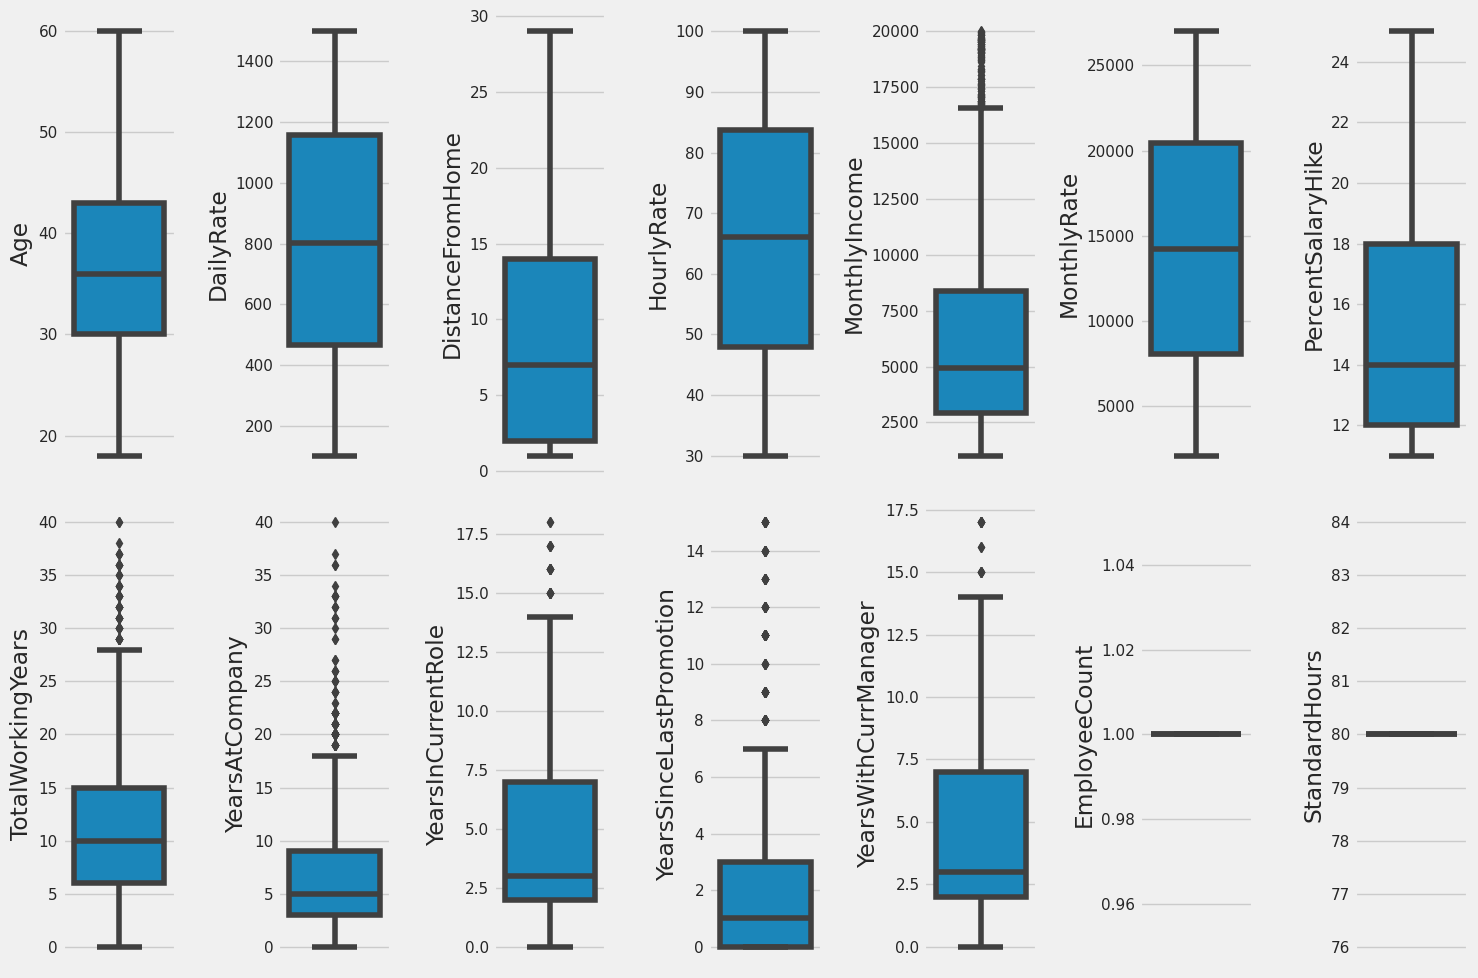

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Insight:  
* Ditemukan adanya **outlier** pada kolom MonthlyIncome, TotalWorkingYears YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager.
* Kolom EmployeeCount dan StandardHours tidak memiliki penyebaran data

##### Numerikal Kolom dengan Attrition

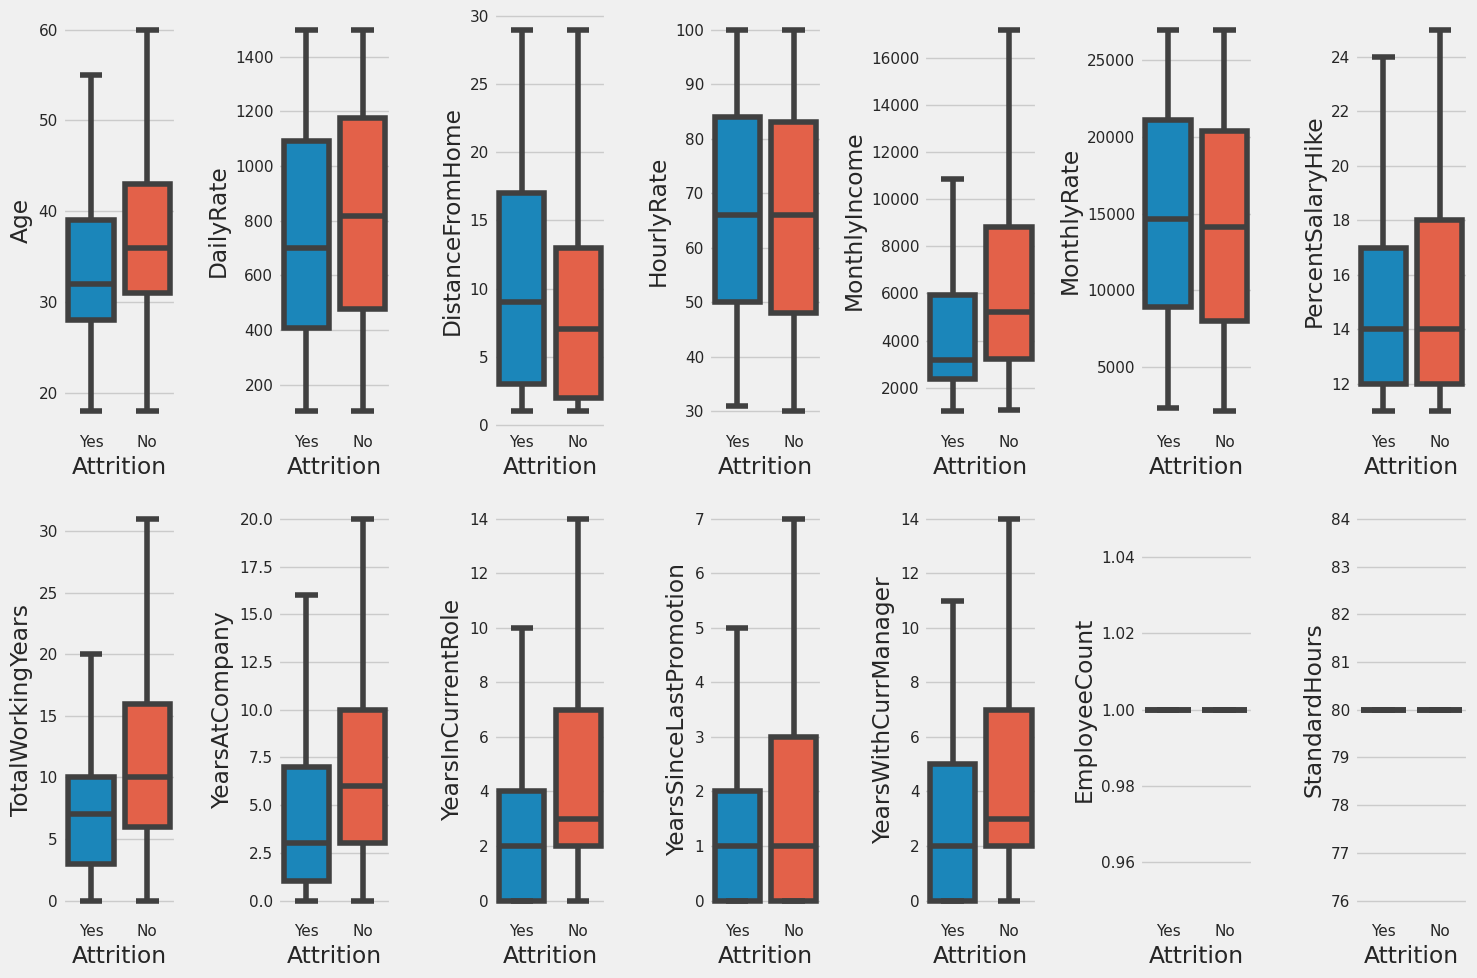

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y = df[nums[i]], x = df['Attrition'], orient='v', showfliers = False)
    plt.tight_layout()

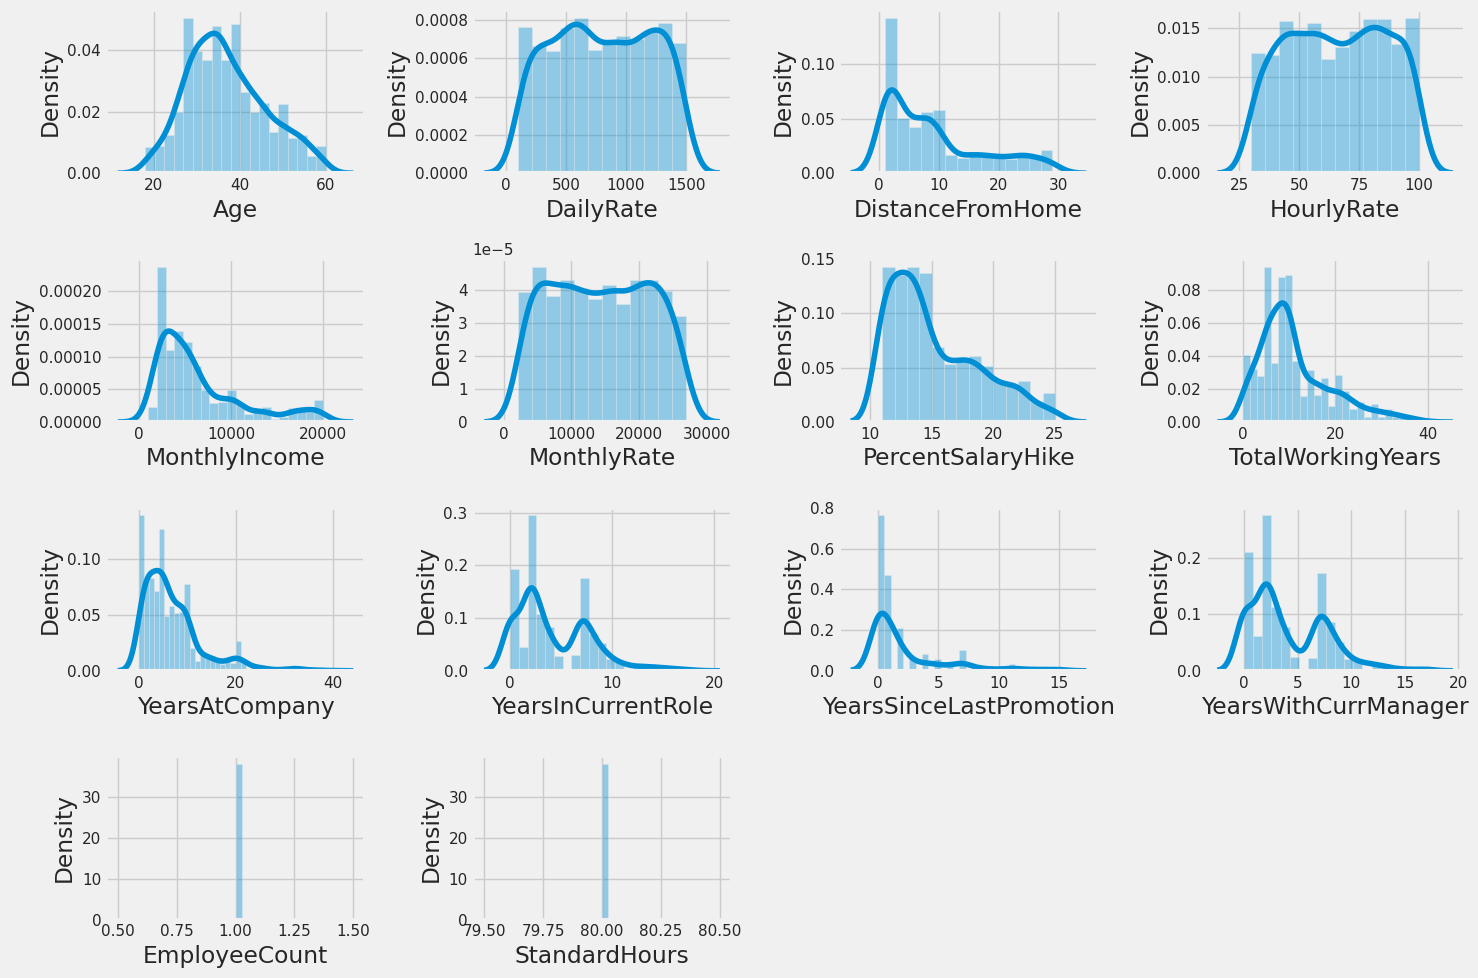

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

Insight Boxplot
- Pada Kolom Age dapat dilihat bahwa penyebaran data yang resign di umur **29-39**
- Ditemukan pada Kolom DistanceFromHome mempunyai penyebaran karyawan dengan tingkat resign yang **tinggi** dibandingkan dengan yang tidak resign. Hal ini mungkin menjadi salah satu alasan karyawan resign karena jarak rumah dengan kantor yang cukup jauh
- Kolom DailyRate, HourlyRate, MonthlyRate memiliki **proporsi** data yang hampir sama berdasarkan grafik diatas untuk karyawan yang resign atau tidak
- untuk MonthlyIncome, terlihat karyawan yang resign pada salary range yang **rendah**
- Mayoritas karyawan yang resign pada kolom YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager adalah kurang dari **5** tahun kerja

Insight DistPlot:
- Bentuk distribusi dari kolom Age adalah **normal**
- Bentuk distribusi dari kolom DailyRate, HourlyRate, MonthlyRate, YearsInCurrentRole, dan YearsWithCurrManager adalah **bimodal**

- Bentuk distribusi dari kolom DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, dan YearsSinceLastPromotion adalah Positive **Skewed**


##### Kategorikal Kolom

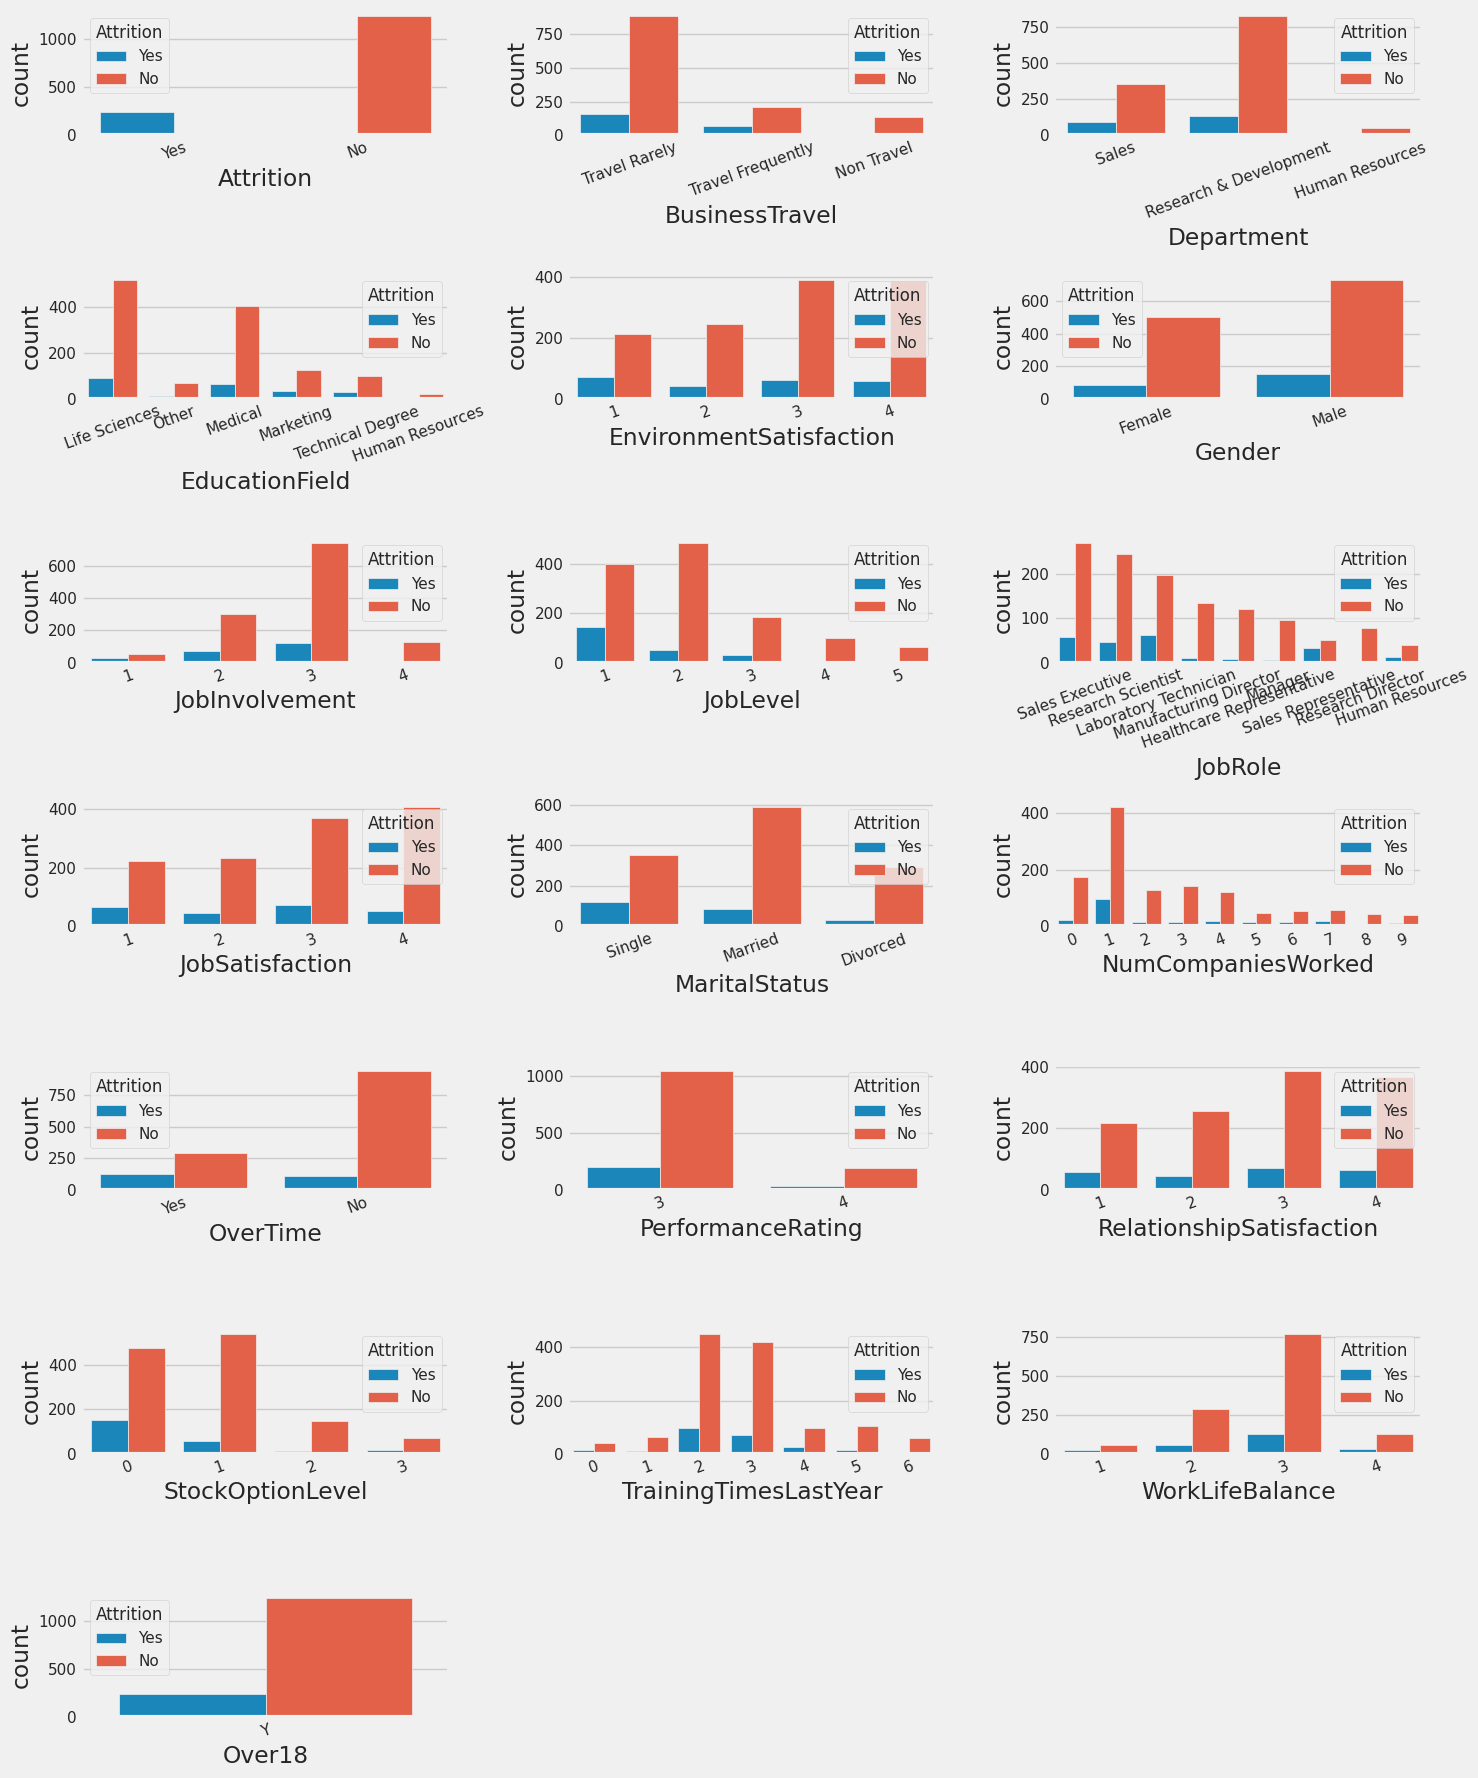

In [ ]:
plt.figure(figsize=(15, 18))
for i in range (0, len(cats)):
    plt.subplot(7, 3, i+1)
    sns.countplot(x=df[cats[i]], hue = df['Attrition'])
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Insight:


1.   Karyawan yang attrition atau menetap bekerja di perusahaan lebih banyak secara signifikan daripada yang resign
2.   Pada kolom business travel, karyawan yang paling banyak resign merupakan karyawan yang jarang melakukan business travel
3. Diantara semua departemen, Divisi Research and Development memiliki karyawan yang paling banyak resign
4. Karyawan yang memiliki edukasi di bidang Life Science banyak resign
5. Karyaawan yang berada di joblevel 1 paling banyak resign atau melakukan attrition
6. Berdasarkan data di atas, ketika karyawan baru bekerja di 1 perusahaan, karyawan dengan kategori tersebut banyak melakukan resign atau attrition
7. Data di atas menunjukkan pula bahwa karyawan yang melakukan overtime cenderung resign. Walaupun jumlah karyawan yang resign antara mereka yang melakukan overtime dan yang tidak itu serupa, namun perbandingan antara karyawan overtime yang resign dan yang tidak itu lebih kecil dibandingkan dengan yang tidak overtime. Hal ini menunjukkan bahwa overtime atau tidaknya suatu perusahaan dapat mempengaruhi keputusan karyawan untuk resign
8. Karyawan yang memiliki stock option level 0 dan 1 lebih banyak yg memutuskan utk resign




####3) Multivariate Analysis

##### Korelasi antar Variabel

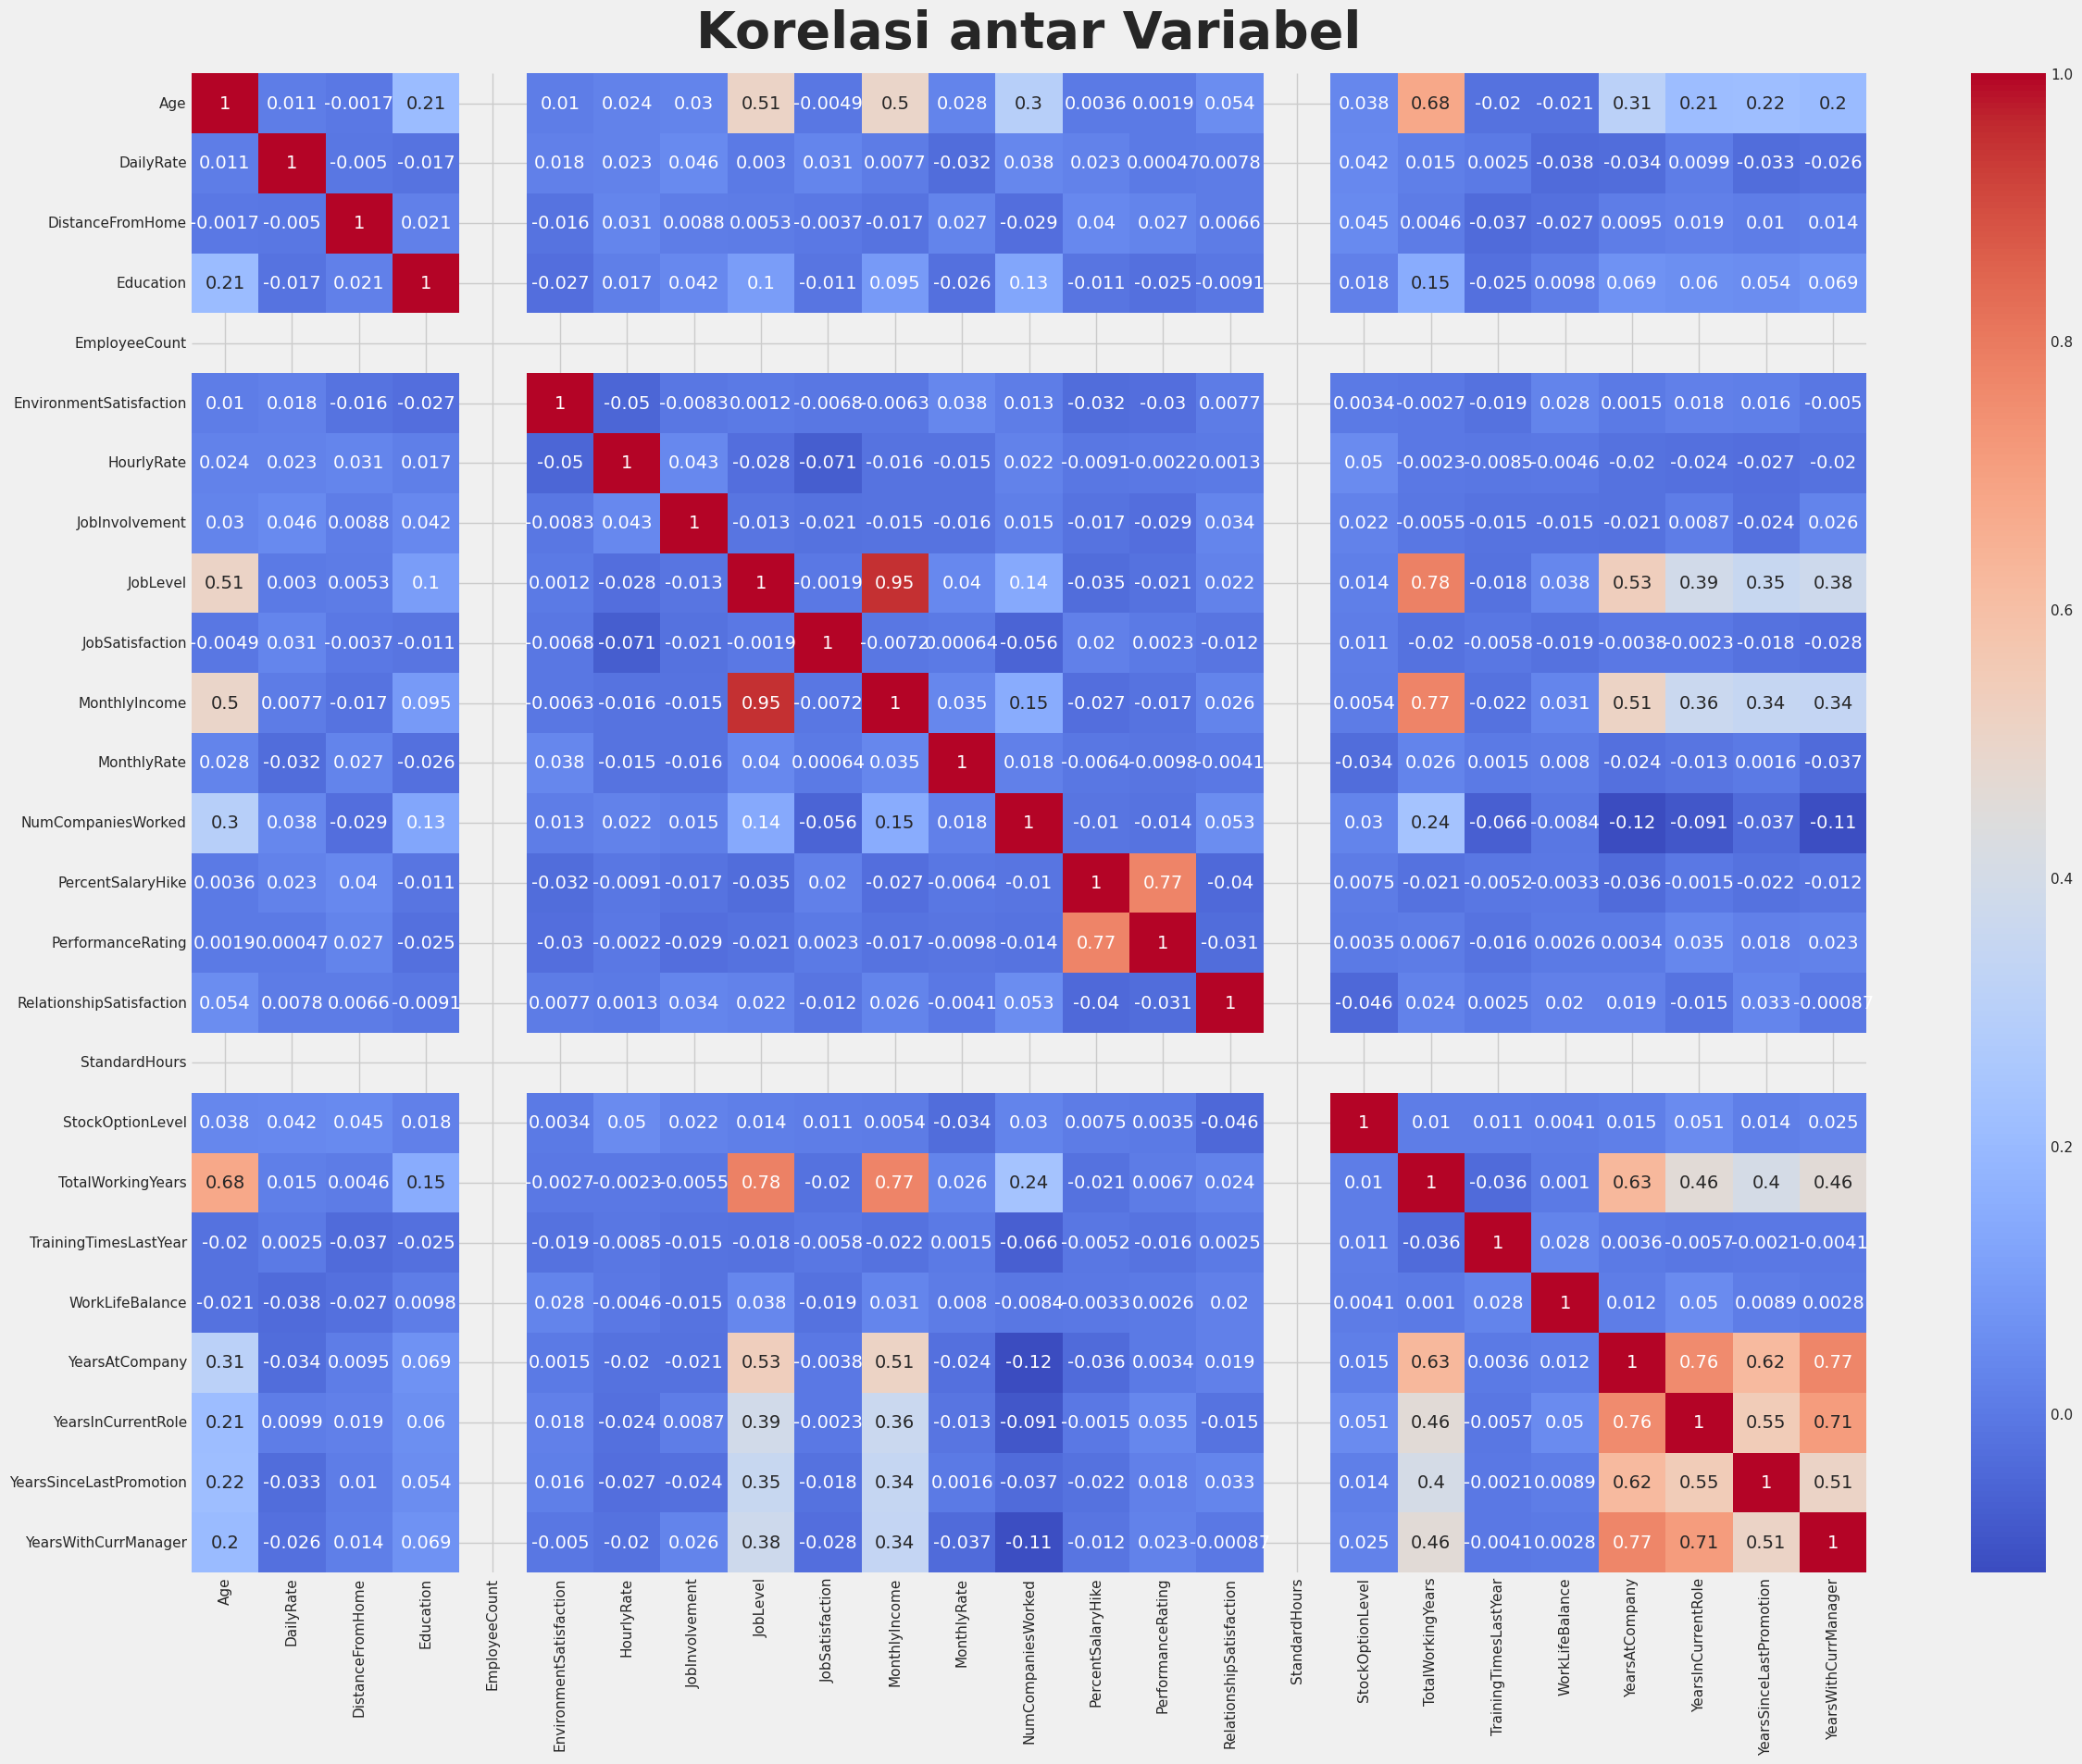

In [ ]:
# HEATMAP Antar Variable
plt.figure(figsize=(26,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel', fontsize=40, fontweight='bold', pad=20)

plt.show()

Insight:
- Kolom MonthlyIncome dan JobLevel memiliki korelasi yang bernilai > 90, hal ini menandakan ke-2 fitur tersebut redundan. Dimana keduanya akan memberikan insight yang sama, sehingga cukup dipakai salah satunya saja.

##### Korelasi Feature dengan Target

In [ ]:
df_corr = df.drop(['EmployeeCount', 'StandardHours'], axis = 1)
df_corr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
df_corr['Attrition_Flag'] = df_corr.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

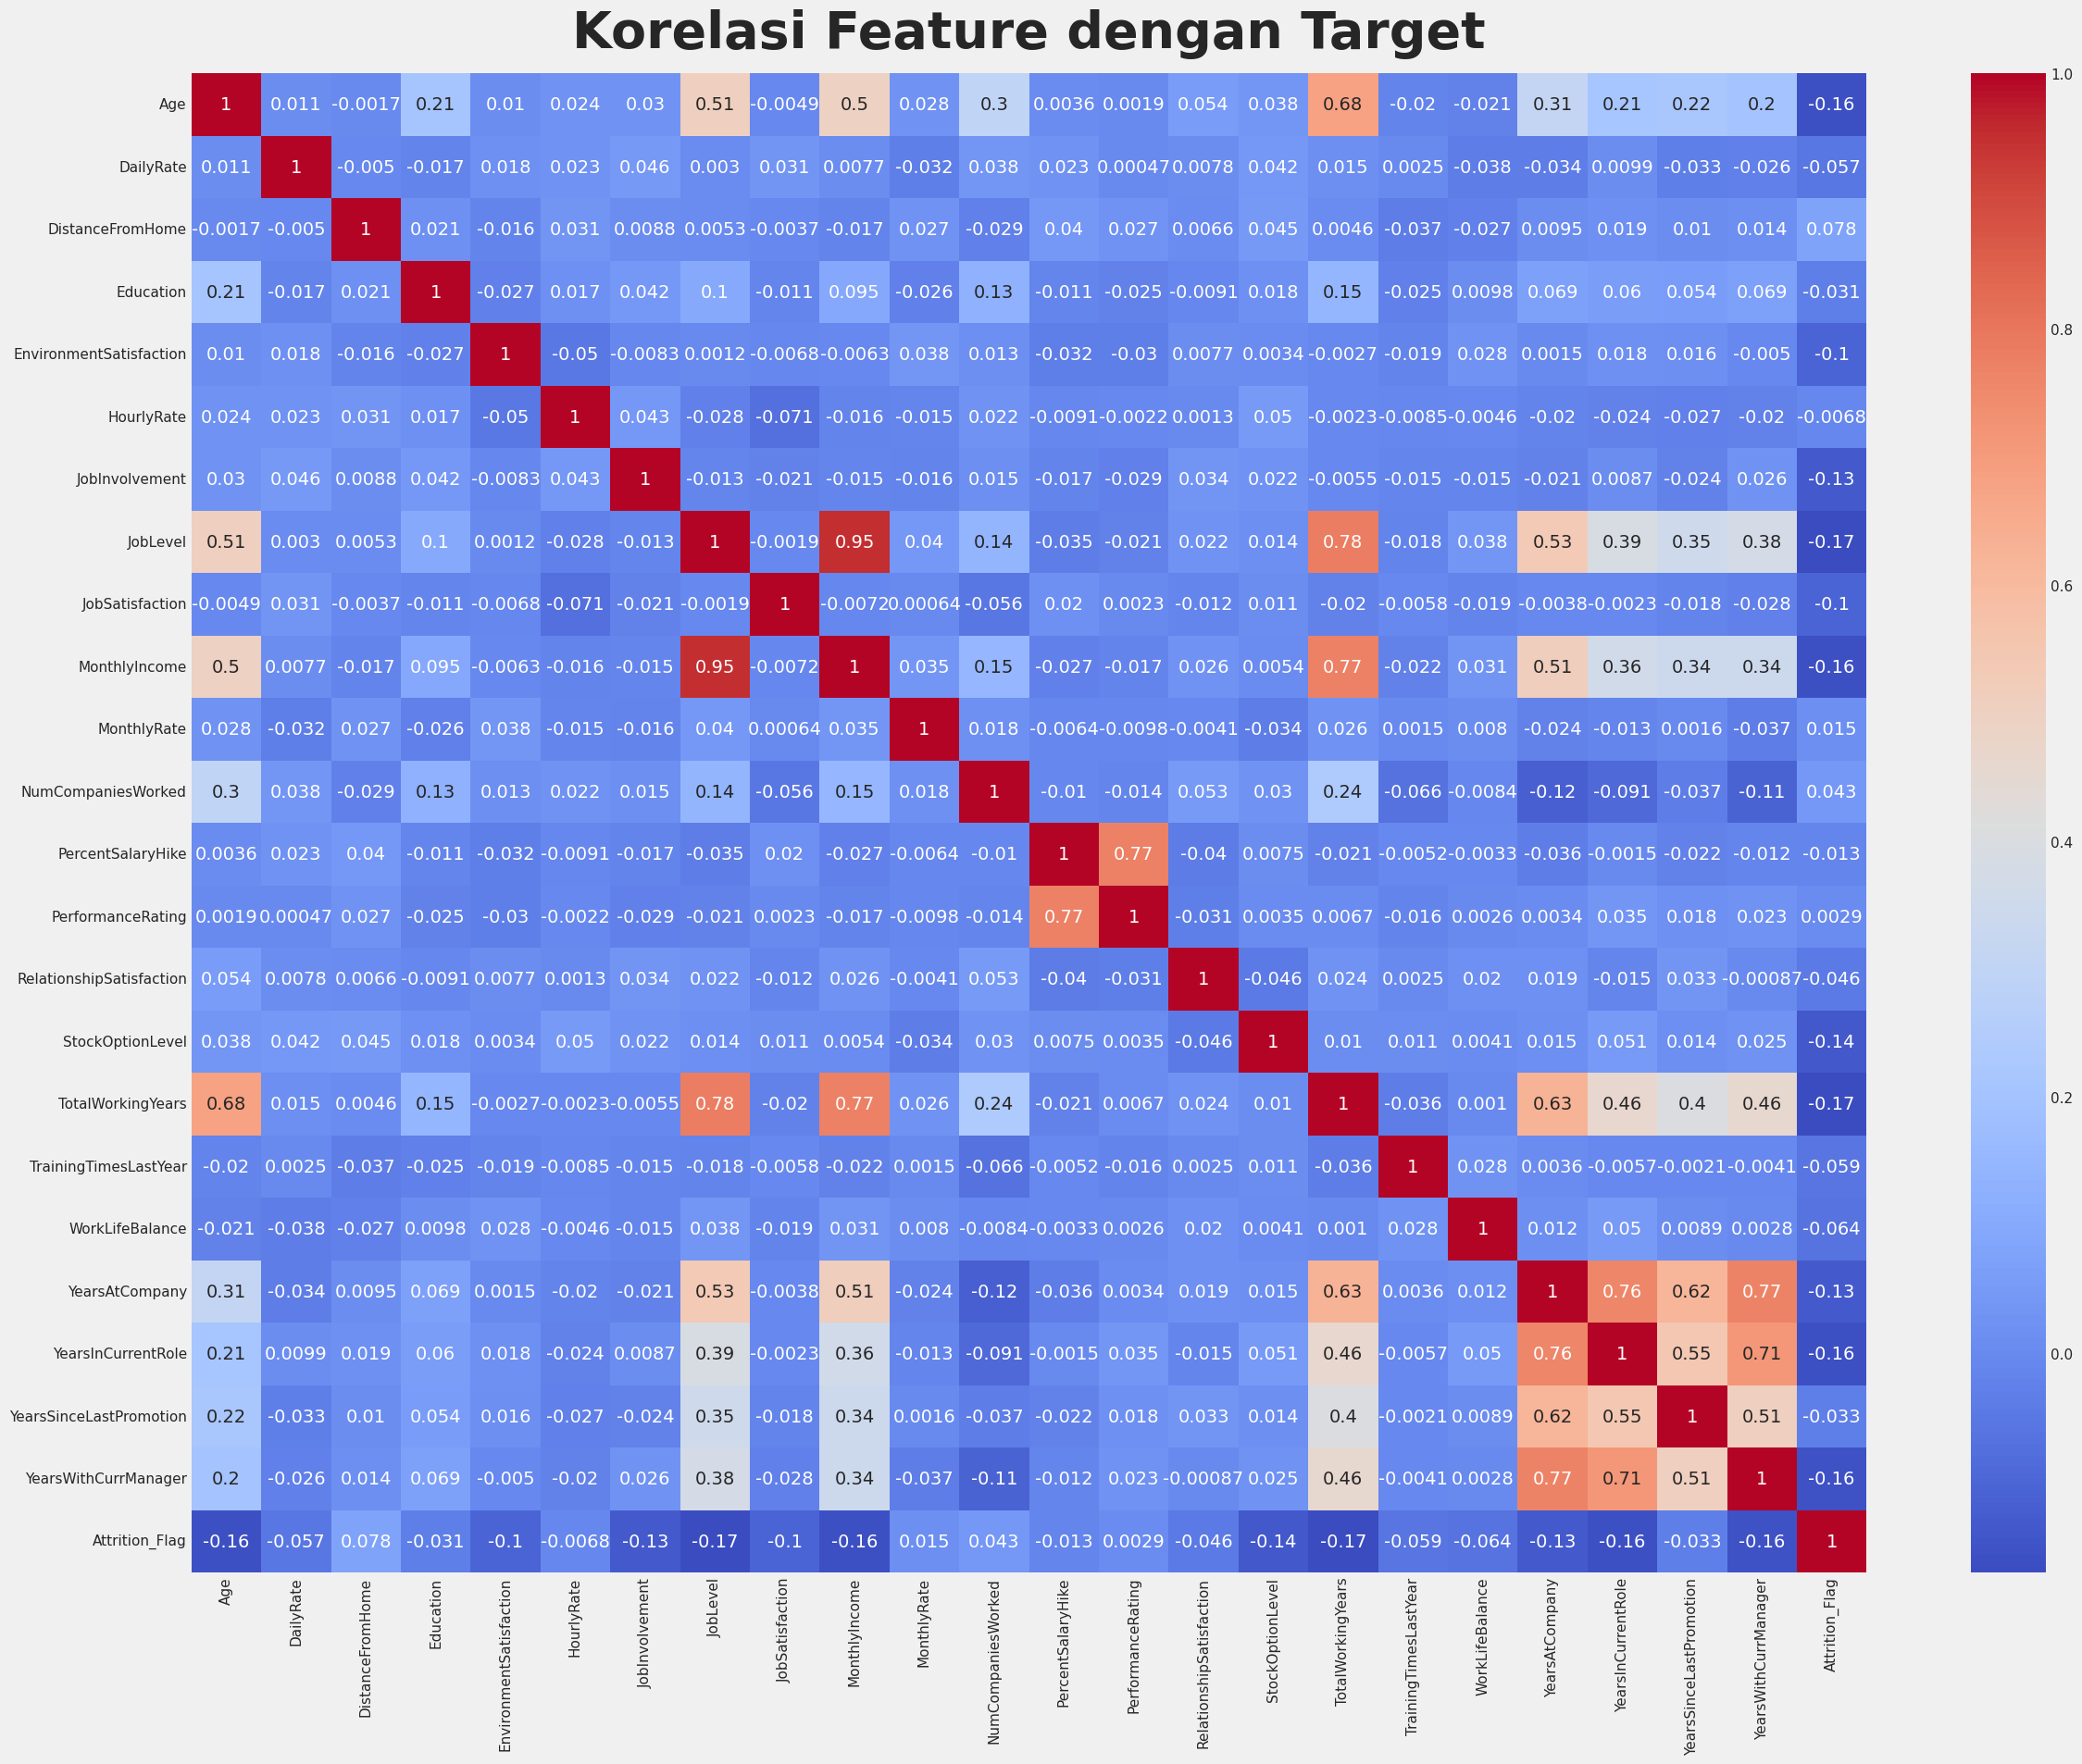

In [ ]:
plt.figure(figsize=(26,20))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Feature dengan Target', fontsize=40, fontweight='bold', pad=20)
plt.show()

Insight:
- Nilai korelasi tertinggi antara feature dan target adalah pada kolom JobLevel dan TotalWorkingYears dengan Attrition_Flag, yaitu bernilai -0.17. Artinya semakin tinggi jabatan karyawan di perusahaan dan semakin lama total pengalaman kerja karyawan, maka karyawan tersebut cenderung tidak melakukan atrisi.

### Business Insight & Recommendation

#### Attrition berdasarkan Job Level

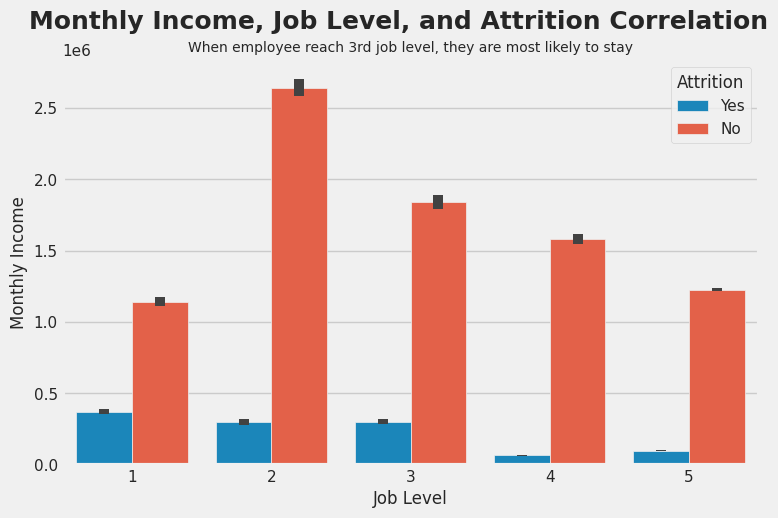

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'JobLevel', y = 'MonthlyIncome', data =df, estimator = sum, hue ='Attrition')
plt.legend(title = 'Attrition', loc='upper right')
plt.xlabel('Job Level', fontsize =12)
plt.ylabel('Monthly Income', fontsize =12)
plt.suptitle('Monthly Income, Job Level, and Attrition Correlation', fontsize = 18, fontweight = 'bold')
plt.title('When employee reach 3rd job level, they are most likely to stay', fontsize =10)
plt.show()

Berdasarkan visualisasi, dapat dilihat bahwa semakin **tinggi** job level seseorang, maka semakin kecil kemungkinan mereka untuk resign dari perusahaan. Sebaliknya, semakin **rendah** job level seseorang, biasanya employee akan memilih untuk resign dari perusahaan.

Oleh sebab rekomendasi yang bisa diberikan  berdasarkan analisis data diatas berupa tim HR dapat memberikan **insentif** lebih terhadap employee yg memiliki job level di bawah **3**, berupa tunjangan ataupun bonus. Pemberian kompensasi atau benefit juga dinilai dapat meningkatkan tingkat retensi pegawai sebagaiamana yang disebutkan oleh Society for Human Resources Management pada link berikut

[Society for Human Resources Management](https://www.shrm.org/resourcesandtools/tools-and-samples/toolkits/pages/managing-for-employee-retention.aspx)

In [ ]:

df['MedianMonthlyIncome'] = df.groupby(['JobLevel', 'JobRole'])['MonthlyIncome'].transform('median')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MedianMonthlyIncome
1156,40,No,Travel Rarely,884,Research & Development,15,3,Life Sciences,1,1628,1,Female,80,2,3,Manufacturing Director,3,Married,10435,25800,1,Y,No,13,3,4,80,2,18,2,3,18,15,14,12,9526.0
579,34,No,Travel Rarely,121,Research & Development,2,4,Medical,1,804,3,Female,86,2,1,Research Scientist,1,Single,4381,7530,1,Y,No,11,3,3,80,0,6,3,3,6,5,1,3,2694.0
1416,38,No,Travel Rarely,1321,Sales,1,4,Life Sciences,1,1995,4,Male,86,3,2,Sales Executive,2,Married,4440,7636,0,Y,No,15,3,1,80,2,16,3,3,15,13,5,8,5454.0
871,24,Yes,Travel Rarely,984,Research & Development,17,2,Life Sciences,1,1219,4,Female,97,3,1,Laboratory Technician,2,Married,2210,3372,1,Y,No,13,3,1,80,1,1,3,1,1,0,0,0,2691.5
282,29,No,Travel Frequently,442,Sales,2,2,Life Sciences,1,388,2,Male,44,3,2,Sales Executive,4,Single,4554,20260,1,Y,No,18,3,1,80,0,10,3,2,10,7,0,9,5454.0


In [ ]:
grouped_data = df.groupby(['JobLevel', 'JobRole'])['MonthlyIncome'].median()
print(grouped_data)

JobLevel  JobRole                  
1         Human Resources               2696.0
          Laboratory Technician         2691.5
          Research Scientist            2694.0
          Sales Representative          2553.0
2         Healthcare Representative     5738.0
          Human Resources               5985.0
          Laboratory Technician         4445.5
          Manufacturing Director        5280.0
          Research Scientist            4869.0
          Sales Executive               5454.0
          Sales Representative          3540.0
3         Healthcare Representative     9854.0
          Human Resources               9853.0
          Laboratory Technician         5381.0
          Manager                      11910.0
          Manufacturing Director        9526.0
          Research Director            13198.5
          Research Scientist            9724.0
          Sales Executive               9208.0
4         Healthcare Representative    13503.0
          Manager       

**Perbandingan antara Monthly Income para pegawai di perusahaan dengan Monthly Income di Market**

Monthly Income pada pasar diperoleh dari data Glassdoor pada tahun yang 2023

Monthly Income pada market bisa jadi tidak akurat, karena faktor berikut:
1.   Gaji mungkin bisa berbeda di industri perusahaan bersangkutan
2. Gaji bisa berbeda mengingat data diambil pada tahun yang berbeda
3. Gaji bisa berbeda mengingat definisi job level antara data perusahaan dengan data glassdoor dapat berbeda
4. Gaji bisa berbeda mengingat data dari glassdoor sangat general



In [ ]:
grouped_data = df.groupby(['JobLevel', 'JobRole'])['MonthlyIncome'].median()
result_df = grouped_data.reset_index()
result_df['MonthlyIncomeMarket'] = [5123,4108,9857,7081,5473,5916,4333, 11928,12737,9985,7766,5658, 6333,4575,8511, 14031, 13473, 11218, 11093, 6280, 10570, 16425, 12616, 12857, 13326, 14577]
print(result_df)

    JobLevel                    JobRole  MonthlyIncome  MonthlyIncomeMarket
0          1            Human Resources         2696.0                 5123
1          1      Laboratory Technician         2691.5                 4108
2          1         Research Scientist         2694.0                 9857
3          1       Sales Representative         2553.0                 7081
4          2  Healthcare Representative         5738.0                 5473
5          2            Human Resources         5985.0                 5916
6          2      Laboratory Technician         4445.5                 4333
7          2     Manufacturing Director         5280.0                11928
8          2         Research Scientist         4869.0                12737
9          2            Sales Executive         5454.0                 9985
10         2       Sales Representative         3540.0                 7766
11         3  Healthcare Representative         9854.0                 5658
12         3

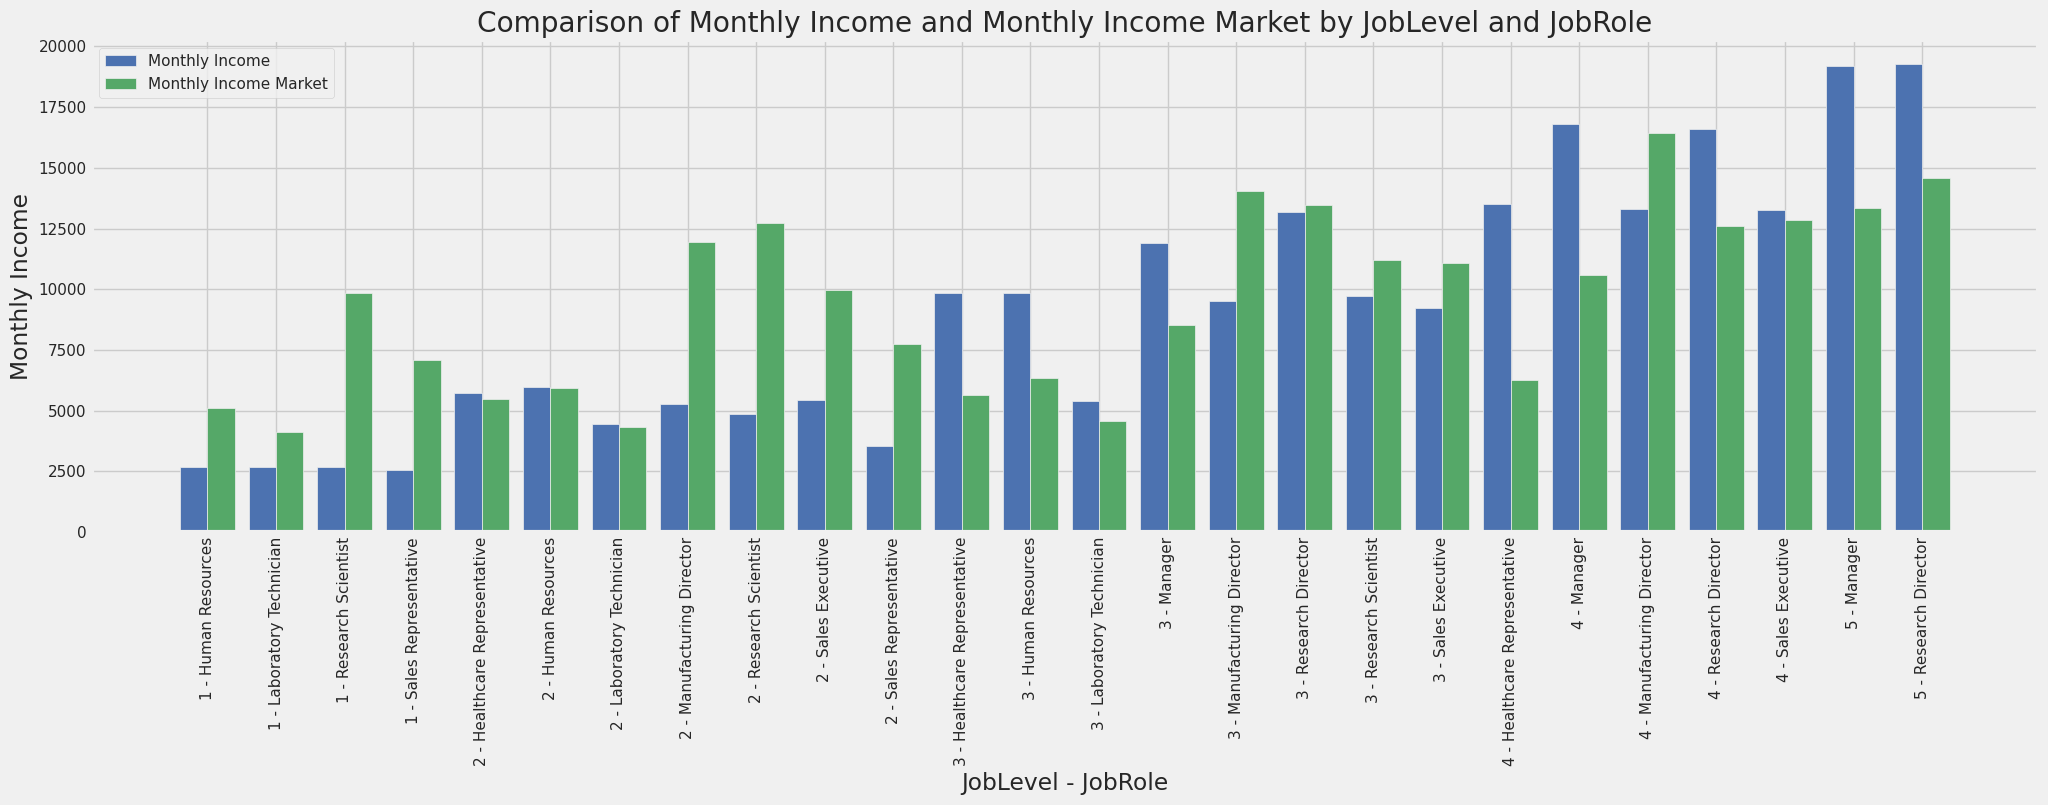

In [ ]:
x_labels = result_df.apply(lambda x: f"{x['JobLevel']} - {x['JobRole']}", axis=1)
bar_width = 0.4
positions = range(len(result_df))
plt.bar(positions, result_df['MonthlyIncome'], width=bar_width, label='Monthly Income', color='b', align='center')
plt.bar([pos + bar_width for pos in positions], result_df['MonthlyIncomeMarket'], width=bar_width, label='Monthly Income Market', color='g', align='center')
plt.xticks([pos + bar_width/2 for pos in positions], x_labels, rotation=90)
plt.xlabel('JobLevel - JobRole')
plt.ylabel('Monthly Income')
plt.title('Comparison of Monthly Income and Monthly Income Market by JobLevel and JobRole')
plt.legend()
plt.tight_layout()
plt.show()

1. Berdasarkan visualisasi di atas, dapat dilihat bahwa hampir seluruh karyawan yang berada di level 1 dan 2 memiliki Monthly Income yang lebih **rendah** daripada Monthly Income di pasaran, kecuali untuk role Healthcare Representative, Laboratory Technician
2. Sebaliknya, pada job level 3,4, dan,5 kebanyakan karyawan memiliki gaji yang lebih tinggi daripada **Monthly Income** di pasaran, kecuali untuk role Manufacturing Director di level 3 dan 4, Research Director dan Research Scientist di Level 3,
3. Job Role Human Resources hanya membayar karyawanya** di bawah Monthly Income di pasaran** hanya pada Job Level 1, untuk role HR di Job Level 2 setara, dan di level 3, **lebih tinggi dari Monthly Income pasaran**
4. Selanjutnya, job role Laboratory Technician di level 1 dan 2 juga **digaji di bawah standar pasar**. Namun, job role Lab Tech di level 3, **karyawan memiliki Monthly Income yang lebih besar daripada pasaran**
5. Terlebih untuk Research Scientist di level manapun, karyawan di perusahaan tersebut digaji **jauh dari Monthly Income pasar**, terutama pada level 1 dan 2
6. Hal yang terjadi juga sama pada role Sales Representative dan Manufacturing Director
7. Hal serupa juga terjadi pada Sales Executive di level 2 dan 3, pada level 4 Sales Executive mendapat **Monthly Income yang lebih besar dari harga pasar**
7. Tapi, hal tersebut tidak terjadi pada role Healthcare Representative. Karyawan di role ini memiliki **Monthly Income yang lebih dari Monthly Income pasaran**
8. Karyawan yang memiliki role Manager menerima Monthly Income yang **jauh lebih tinggi daripada standar pasar**, selisih paling jauh berada pada level 5
9. Pada level 3, Research Director memiliki Monthly Income **sedikit di bawah standar pasar**, namun pada level 4 dan 5, Monthly Income Research Director akhirnya **lebih besar cukup signifikan daripada standar pasar**

<class 'pandas.core.series.Series'>
MultiIndex: 27 entries, (1, 'Human Resources') to ('MonthlyIncomeMarket', '')
Series name: MonthlyIncome
Non-Null Count  Dtype 
--------------  ----- 
27 non-null     object
dtypes: object(1)
memory usage: 683.0+ bytes


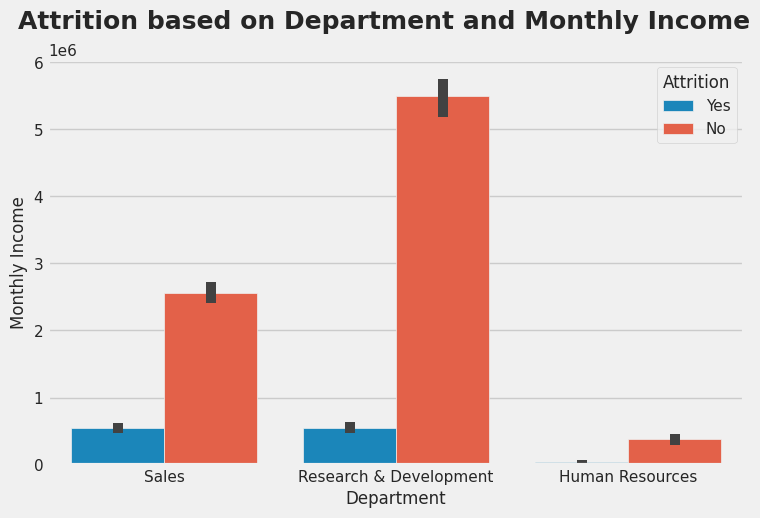

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Department', y = 'MonthlyIncome',data =df, estimator = sum, hue ='Attrition', orient = 'v')
plt.legend(title = 'Attrition', loc='upper right')
plt.xlabel('Department', fontsize =12)
plt.ylabel('Monthly Income', fontsize =12)
plt.suptitle('Attrition based on Department and Monthly Income', fontsize = 18, fontweight = 'bold')
plt.show()

1.   Selisih jumlah karyawan antara yang atrisi dan tidak **di semua departemen** cukup signifikan
2.   Visualisasi di atas menunjukkan bahwa pendapatan karyawan Departemen Research and Development paling tinggi di antara semua departemen dan juga karyawan departemen Research and Development paling banyak yang menetap di perusahaan
3. Untuk divisi Human Resources, jumlah karyawan yang resign nyaris tidak ada, maka dapat menjadi contoh bagi departemen lainnya dalam menurunkan tingkat atrisi



#### Attrition Berdasarkan Marital Status dan Percent Salary Hike

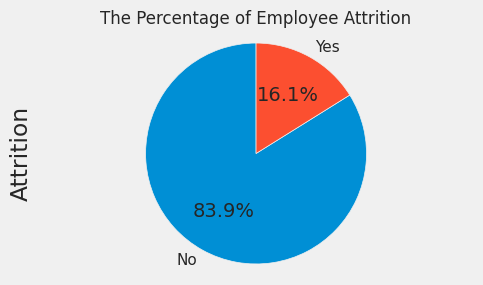

In [ ]:
# Menghitung jumlah karyawan berdasarkan Attrition
attrition_counts = df['Attrition'].value_counts()

# Membuat pie chart
plt.figure(figsize=(5, 3))
attrition_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Menampilkan judul
plt.title('The Percentage of Employee Attrition', fontsize=12)

# Menampilkan pie chart
plt.axis('equal')
plt.show()

Tingkat atrisi karyawan mencapai 16,1%

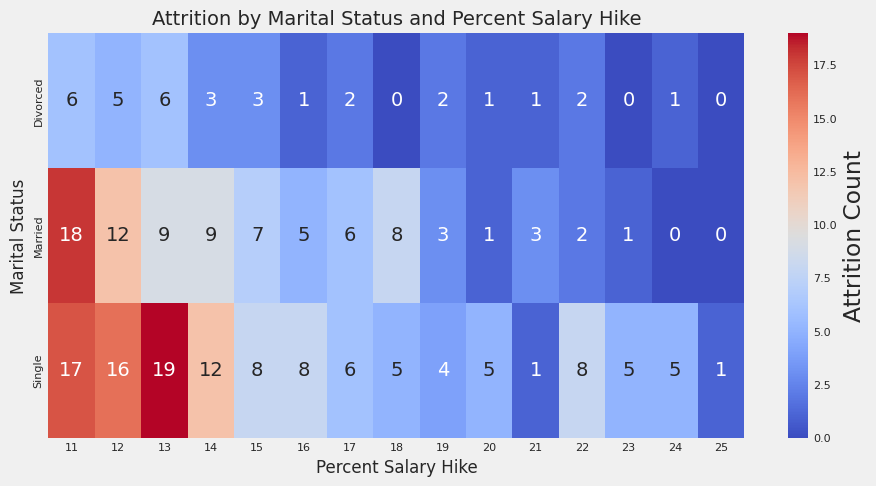

In [ ]:
# Pilih data dengan attrition "Yes"
attrition_yes = df[df['Attrition'] == 'Yes']

# Pilih kolom yang akan divisualisasikan
selected_columns = ['MaritalStatus', 'PercentSalaryHike']
selected_data = attrition_yes[selected_columns]

# Buat pivot table untuk menghitung jumlah atrisi berdasarkan marital status dan percent salary hike
pivot_table = selected_data.pivot_table(index='MaritalStatus', columns='PercentSalaryHike', aggfunc='size', fill_value=0)

# Buat heatmap
plt.figure(figsize=(10, 5))  # Ubah ukuran grafik menjadi lebih lebar (sesuaikan lebar sesuai kebutuhan)
heatmap = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Attrition Count'})

plt.xlabel('Percent Salary Hike', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.title('Attrition by Marital Status and Percent Salary Hike', fontsize=14)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

plt.show()

Diperoleh insight bahwa:
1. Karyawan dengan status pernikahan "Single" memiliki tingkat atrisi yang lebih tinggi dibandingkan karyawan dengan status pernikahan lainnya.
2. Karyawan dengan kenaikan gaji (percent salary hike) kurang dari 15% memiliki tingkat atrisi yang lebih tinggi.

Maka rekomendasi yang dapat diberikan dari insight yang didapatkan tersebut adalah hendaknya perusahaan memberikan percent salary hike di atas 15%

#### Attrition berdasarkan Age, Department dan Job Role


In [ ]:
import plotly.express as px
import scipy.stats as scp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
age_rsg=df.groupby(['Age','Attrition']).apply(lambda x:x['TotalWorkingYears'].count()).reset_index(name='Counts')
px.line(age_rsg,x='Age',y='Counts',color='Attrition',title='Agewise Distribution of People')

Berdasarkan visualisasi diatas, dapat dilihat bahwa attrition yang ada paling tinggi pada usia 29 dan 31, yakni 18 orang atau sekitar 26% dari total karyawan yang berumur 29 tahun. Dengan demikian, tim HR perusahaan  dapat menganalisis lebih dalam dengan pendekatan human resources pada rentang umur 29-31.

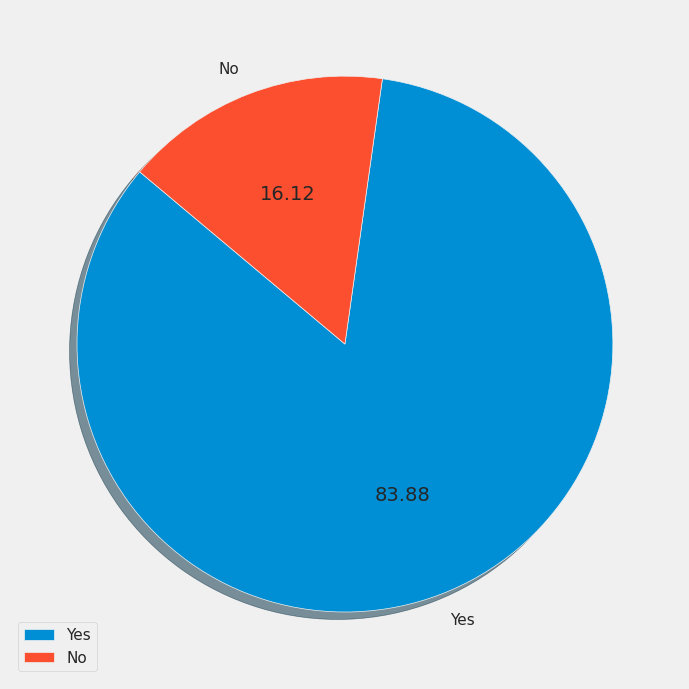

In [ ]:
target=df.iloc[:,1].value_counts()
plt.pie(target,labels=["Yes","No"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("Attrition")
plt.legend(loc = "lower left")
plt.show()

In [ ]:
#sns.countplot(x='Age', hue='Attrition', data=df);

Dari Visualisasi di atas dapat di lihat dari umur 28, 29 dan 31 memiliki attrition yang tinggi

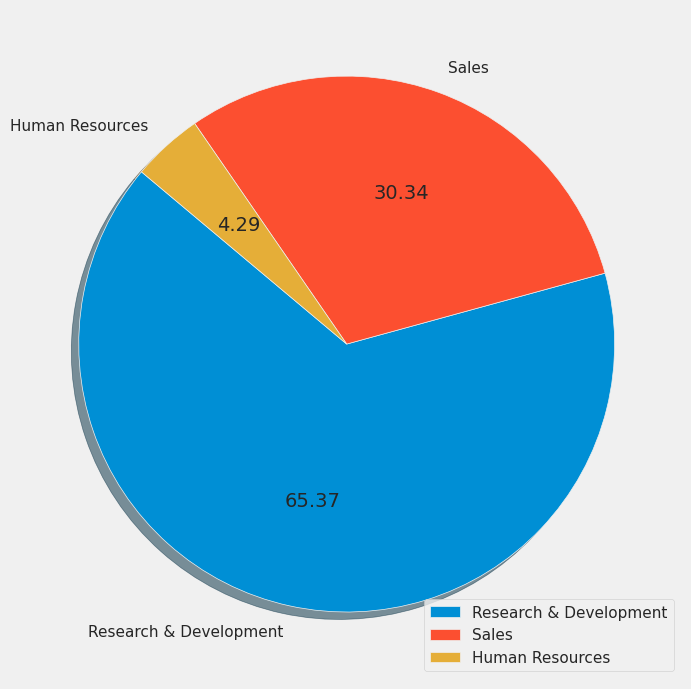

In [ ]:
target=df.iloc[:,4].value_counts()
plt.pie(target,labels=["Research & Development","Sales","Human Resources"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("Department")
plt.legend(loc = "lower right")
plt.show()

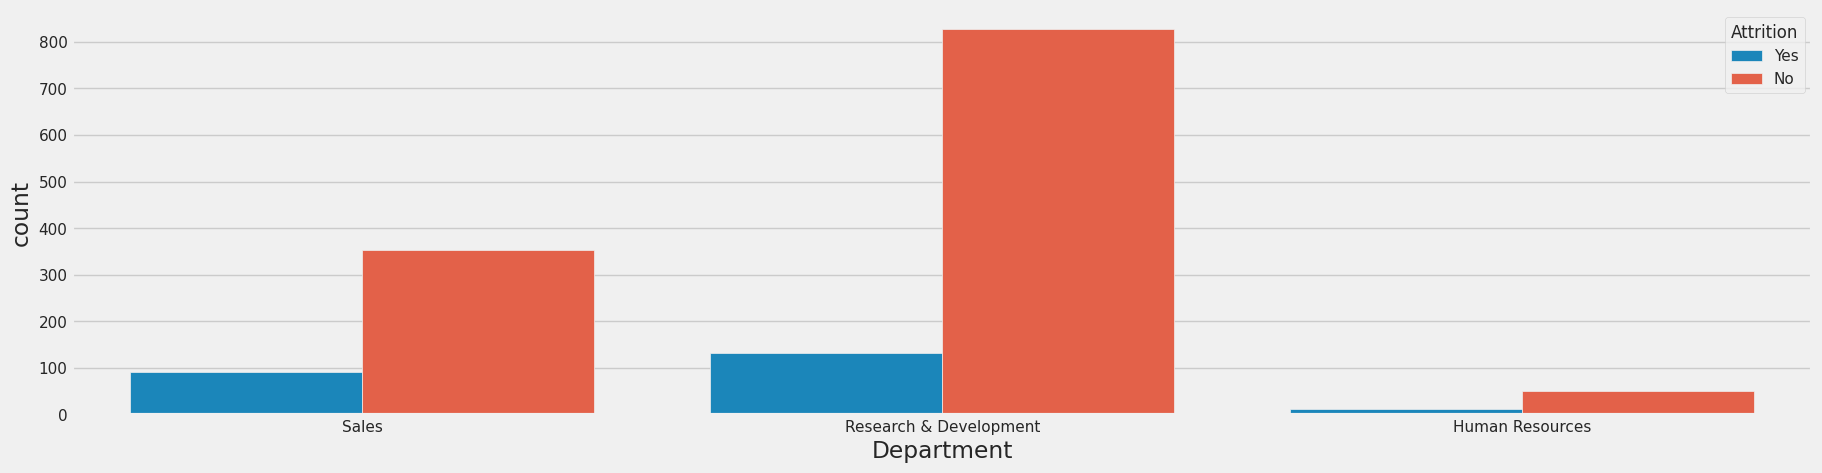

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x='Department', hue='Attrition', data=df);

Dapat di lihat visusalisasi di atas Deparment Research & Development memiliki attration yang tinggi sebesar 65.37%, Sales sebesar 30.34% dan Human Resources 4.29%.

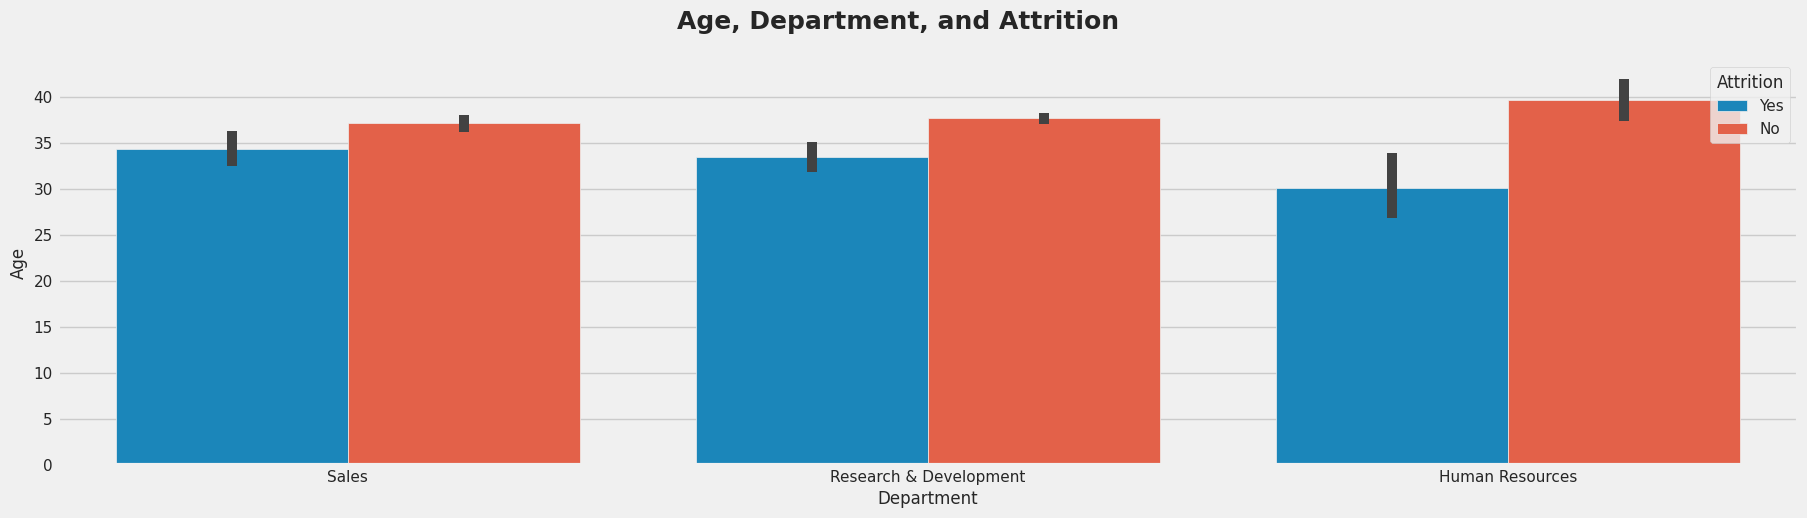

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Department', y = 'Age', data =df, hue= 'Attrition')
plt.legend(title = 'Attrition', loc='upper right')
plt.xlabel('Department', fontsize =12)
plt.ylabel('Age', fontsize =12)
plt.suptitle('Age, Department, and Attrition', fontsize = 18, fontweight = 'bold')
plt.show()

Berdasarkan Departmentnya, pegawai yang bekerja di tim Sales memiliki attrition terbanyak yaitu dengan umur 34 kemudian Research & Development di umur 33

##### Attrition berdasarkan Job Role

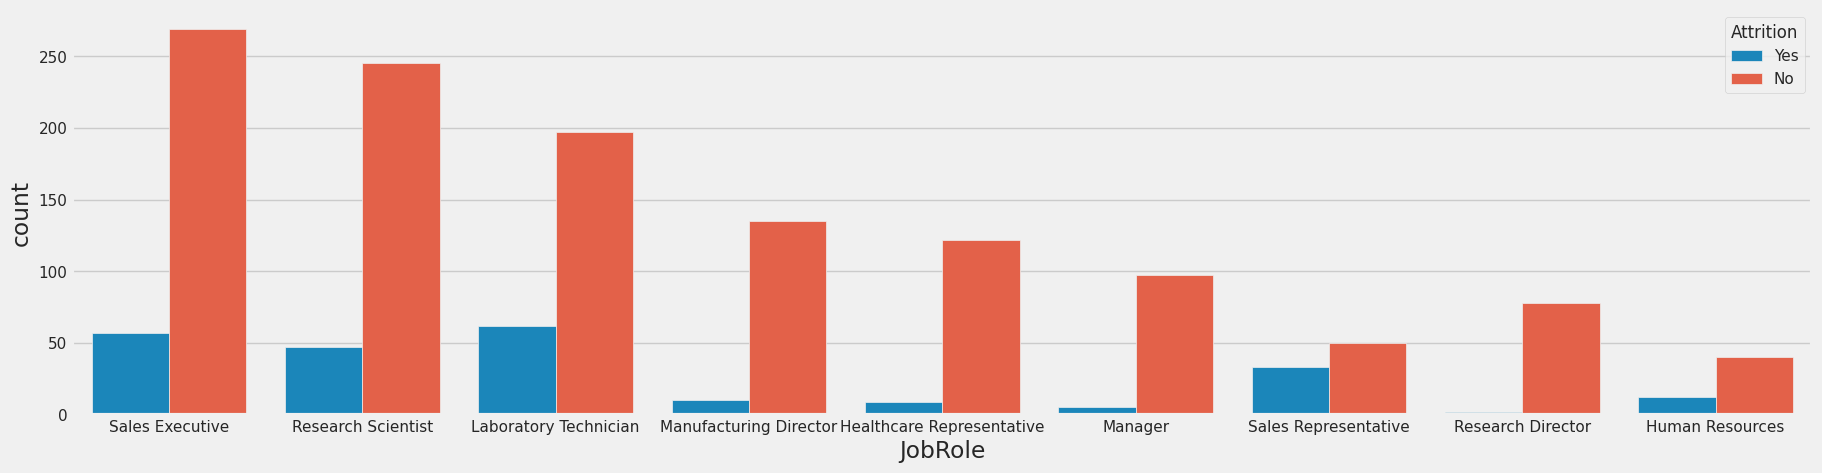

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x='JobRole', hue='Attrition', data=df);

Dari visualisasi di atas Sales Executive memiliki attration No terbanyak dan
Laboratory Technician dan Sales Executive memiliki attrition Yes terbanyak

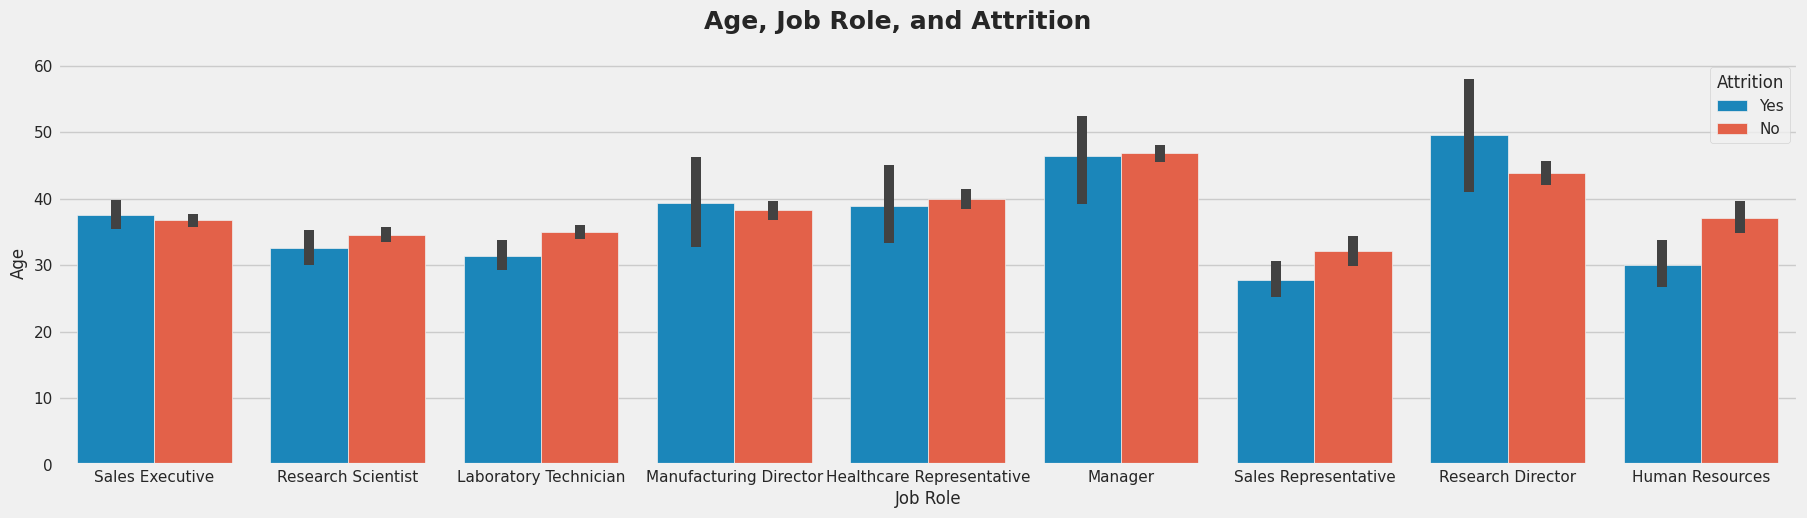

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'JobRole', y = 'Age', data =df, hue= 'Attrition')
plt.legend(title = 'Attrition', loc='upper right')
plt.xlabel('Job Role', fontsize =12)
plt.ylabel('Age', fontsize =12)
plt.suptitle('Age, Job Role, and Attrition', fontsize = 18, fontweight = 'bold')
plt.show()



##### Rekomendasi

Maka rekomendasi yang dapat diberikan untuk menurunkan tingkat attrisi adalah  di lihat dari Age dan Job Role agar dapat mengantisipasi pegawai yang resign dari salah satu Department tersebut.

Dengan melakukan peninjauan dari beberapa feature diatas, maka Department dapat meningkatkan kepuasan untuk setiap pegawainya dan juga bisa menyediakan pegawai pengganti jika ada seseorang yang meninggalkan perusahaan.


# Data Pre-Processing

> Delete **EmployeeCount, Over18 dan StandardHours**


In [ ]:
# df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours'], inplace = True)

In [ ]:
# Creating a function to plot histograms
def barplot(i):
    fig = px.histogram(df, x = df[i], template = 'plotly_dark',
                      title = f'Dataset x {i}', text_auto = 'd3-format')
    fig.show()

In [ ]:
barplot('Attrition')
barplot('BusinessTravel')
barplot('Department')
barplot('EducationField')
barplot('Gender')
barplot('JobRole')
barplot('MaritalStatus')
barplot('Over18')
barplot('OverTime')